#  Finding how to start a Phase injected Topology optimization

In [1]:
import meep as mp
print(mp.__version__)
import meep.adjoint as mpa
import numpy as np
from autograd import numpy as npa
from matplotlib import pyplot as plt
from IPython.display import Video

1.27.0


In [2]:
resolution = 20   # pixels/μm

Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.44)
Air = mp.Medium(index=1)


dpml = 1.0
pml_layers = [mp.PML(dpml)]




a = 1.0     # waveguide width/height

k_point = mp.Vector3(z=0.5)

In [3]:
sx = 5
sy = 3

cell = mp.Vector3(sx+2*dpml,sy+2*dpml,0)

s=0.1
xodd=False

w_h=a#0.22
w_w=a#0.5
soi_h=1

geometry = [mp.Block(center=mp.Vector3(),
                        size=mp.Vector3(w_w,w_h,mp.inf),
                        material=Si),
            mp.Block(center=mp.Vector3(0,-(soi_h+w_h)/2),
                        size=mp.Vector3(sx,soi_h,mp.inf),
                        material=SiO2)
                        ]

symmetries = [mp.Mirror(mp.X, phase=-1 if xodd else 1),
                mp.Mirror(mp.Y, phase=-1)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    symmetries=symmetries,
                    k_point=k_point)

sim.init_sim()
EigenmodeData = sim.get_eigenmode(0.22,
                                    mp.Z,
                                    mp.Volume(center=mp.Vector3(), size=mp.Vector3(sx,sy)),
                                    2 if xodd else 1,
                                    k_point,
                                    match_frequency=False,
                                    parity=mp.ODD_Y)

fcen =EigenmodeData.freq

sim.reset_meep()

eig_sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.1*fcen),
                                    size=mp.Vector3(sy,sy),
                                    center=mp.Vector3(),
                                    eig_band=1,
                                    eig_kpoint=k_point,
                                    eig_match_freq=False,
                                    eig_parity=mp.ODD_Y)]



sim.change_sources(eig_sources)

# flux_reg = mp.FluxRegion(direction=mp.Z, center=mp.Vector3(), size=mp.Vector3(sx,sy))
# wvg_flux = sim.add_flux(fcen, 0, 1, flux_reg)

# force_reg1 = mp.ForceRegion(mp.Vector3(0.49*s), direction=mp.X, weight=1, size=mp.Vector3(y=sy))
# force_reg2 = mp.ForceRegion(mp.Vector3(0.5*s+1.01*a), direction=mp.X, weight=-1, size=mp.Vector3(y=sy))
# wvg_force = sim.add_force(fcen, 0, 1, force_reg1, force_reg2)

#sim.run(until_after_sources=1000)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00177789 s
Working in 2D dimensions.
Computational cell is 7 x 5 x 0 with resolution 20
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
time for set_epsilon = 0.00581217 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,0,0.5) = 0.227633 after 24 iters
Dominant planewave for band 1: (0.000000,0.000000,0.500000)


     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)


<Axes: xlabel='X', ylabel='Y'>

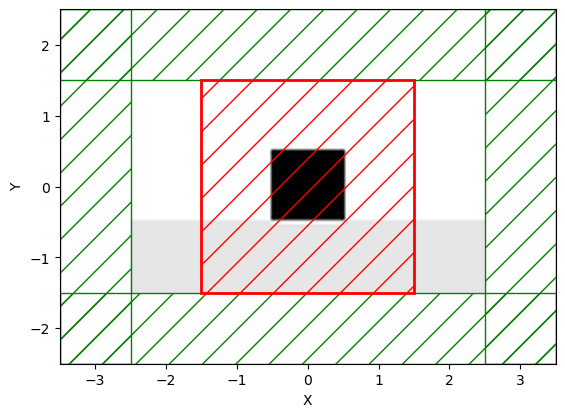

In [4]:
sim.plot2D()

In [5]:
sim.run(until_after_sources=1000)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00190091 s
Working in 2D dimensions.
Computational cell is 7 x 5 x 0 with resolution 20
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
time for set_epsilon = 0.00562811 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,0,0.5) = 0.227578 after 22 iters


FloatProgress(value=0.0, description='0% done ', max=1439.304443359375)

Meep progress: 473.45000000000005/1439.304443359375 = 32.9% done in 4.0s, 8.2s to go
on time step 18954 (time=473.85), 0.00021104 s/step
Meep progress: 944.25/1439.304443359375 = 65.6% done in 8.0s, 4.2s to go
on time step 37788 (time=944.7), 0.000212384 s/step
Meep progress: 1388.8000000000002/1439.304443359375 = 96.5% done in 12.0s, 0.4s to go
on time step 55563 (time=1389.08), 0.00022505 s/step
run 0 finished at t = 1439.325 (57573 timesteps)


     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)


<Axes: xlabel='X', ylabel='Y'>

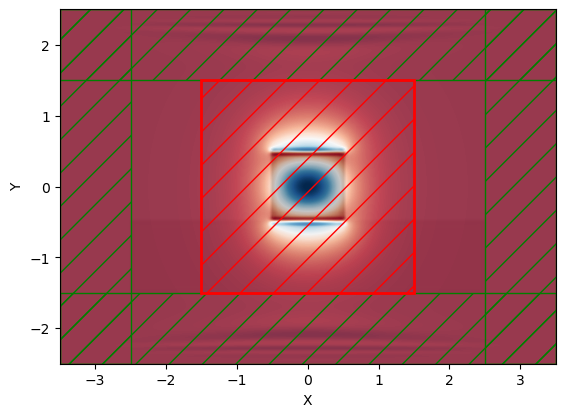

In [11]:
sim.plot2D(fields= mp.Ey)

In [7]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ey, f=f, realtime=False, normalize=True)
plt.close()

In [8]:
sim.run(mp.at_every(1, Animate), until_after_sources=1000)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00244117 s
Working in 2D dimensions.
Computational cell is 7 x 5 x 0 with resolution 20
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
time for set_epsilon = 0.00521612 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,0,0.5) = 0.227578 after 22 iters


FloatProgress(value=0.0, description='0% done ', max=1439.304443359375)

     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-1,0)
          size (5,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
Meep progress: 283.52500000000003/1439.304443359375 = 19.7% done in 4.0s, 16.3s to go
on time step 11357 (time=283.925), 0.000352209 s/step
Meep progress: 660.5500000000001/1439.304443359375 = 45.9% done in 8.0s, 9.4s to go
on time step 26440 (time=661), 0.000265296 s/step
Meep progress: 1044.0/1439.304443359375 = 72.5% done in 12.0s, 4.5s to go
on time step 41782 (time=1044.55), 0.000260722 s/step
Meep progress: 1428.8000000000002/1439.304443359375 = 99.3% done in 16.0s, 0.1s to go
on time step 57167 (time=1429.18), 0.000259998 s/step
Normalizing field data...
run 1 finished at t = 1439.325 (57573 timesteps)


In [9]:
filename = "straignt_waveguides_3D_2d_cell.mp4"
Animate.to_mp4(10, filename)

Generating MP4...


In [10]:
Video(filename)
